In [3]:
import ccxt
import pandas as pd
import config
import yfinance as yf

In [122]:
import numpy as np
# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Data fetching
from pandas_datareader import data as pdr

In [123]:
def get_ohlcv(acct=ccxt.gemini({'apiKey': config.apiKey, 'secret': config.apiSecret}), security='ETH/USD',time_period='1m'):
    ohlcv = acct.fetch_ohlcv('ETH/USD','1m')
    df = pd.DataFrame(ohlcv, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
    df['Date'] = pd.to_datetime(df['Date'], unit='ms')
    df.set_index('Date', inplace=True)
    df = df.sort_index(ascending=True)
    
    df['Open-Close'] = df.Open - df.Close
    df['High-Low'] = df.High - df.Low
    df = df.dropna()
    
    return df
def buy_signal(df):
    return np.where(df['Close'].shift(-1)>df['Close'],1,-1)

In [58]:
d = get_ohlcv()
Y= buy_signal(d)

In [59]:
d

,open,high,low,close,volume,Open-Close,High-Low
date,,,,,,,
2023-07-02 02:31:00,1919.05,1919.59,1919.05,1919.59,1.188984,-0.54,0.54
2023-07-02 02:32:00,1919.59,1919.59,1919.59,1919.59,0.000000,0.00,0.00
2023-07-02 02:33:00,1919.59,1919.59,1919.59,1919.59,0.000000,0.00,0.00
2023-07-02 02:34:00,1919.59,1920.63,1919.59,1920.62,0.028492,-1.03,1.04
2023-07-02 02:35:00,1920.62,1920.62,1920.62,1920.62,0.000000,0.00,0.00
...,...,...,...,...,...,...,...
2023-07-03 02:26:00,1948.33,1948.33,1948.33,1948.33,0.000000,0.00,0.00
2023-07-03 02:27:00,1948.33,1948.33,1948.33,1948.33,0.000000,0.00,0.00
2023-07-03 02:28:00,1948.33,1949.62,1948.33,1949.62,0.002626,-1.29,1.29


In [60]:
X= d[['Open-Close', 'High-Low']]

In [61]:
X

,Open-Close,High-Low
date,,
2023-07-02 02:31:00,-0.54,0.54
2023-07-02 02:32:00,0.00,0.00
2023-07-02 02:33:00,0.00,0.00
2023-07-02 02:34:00,-1.03,1.04
2023-07-02 02:35:00,0.00,0.00
...,...,...
2023-07-03 02:26:00,0.00,0.00
2023-07-03 02:27:00,0.00,0.00
2023-07-03 02:28:00,-1.29,1.29


In [18]:
Y

array([ 1, -1,  1, ..., -1, -1, -1])

# RSI

In [5]:
import pandas_ta as ta
import pandas as pd
import ccxt

def rsi(exchange= ccxt.gemini({'apiKey': config.apiKey, 'secret': config.apiSecret}), symbol='ETH/USD'):
    symbol = 'ETH/USD'
    timeframe = '1m'
    limit = 50
    try:
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe)
        print('--------------------------------------------------------------')
        if len(ohlcv):
            df = pd.DataFrame(ohlcv, columns=['time', 'open', 'high', 'low', 'close', 'volume'])
            df['time'] = pd.to_datetime(df['time'], unit='ms')
            df = pd.concat([df, df.ta.rsi()], axis=1)
            return df[-20:]
            print(exchange.iso8601 (exchange.milliseconds()))
    except Exception as e:
        print(type(e).__name__, str(e))

In [6]:
rsi()

--------------------------------------------------------------


,time,open,high,low,close,volume,RSI_14
1420,2023-07-03 23:13:00,1954.33,1954.47,1954.33,1954.47,0.024441,37.851441
1421,2023-07-03 23:14:00,1954.47,1954.47,1952.98,1952.98,1.190000,25.140636
1422,2023-07-03 23:15:00,1952.98,1953.06,1952.98,1953.06,0.004590,26.566485
1423,2023-07-03 23:16:00,1953.06,1953.06,1953.06,1953.06,0.000000,26.566485
1424,2023-07-03 23:17:00,1953.06,1953.06,1951.23,1951.86,0.054805,19.954536
1425,2023-07-03 23:18:00,1951.86,1951.86,1951.86,1951.86,0.000000,19.954536
1426,2023-07-03 23:19:00,1951.86,1953.37,1951.86,1953.37,0.550608,41.281729
1427,2023-07-03 23:20:00,1953.37,1953.37,1952.89,1952.89,0.011978,37.831125
1428,2023-07-03 23:21:00,1952.89,1952.89,1952.40,1952.40,0.049440,34.647319
1429,2023-07-03 23:22:00,1952.40,1952.40,1952.27,1952.27,0.004592,33.833778


In [49]:
split_percentage = 0.7
split = int(split_percentage*len(d))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:] 

# instantiate knn model

In [53]:
knn = KNeighborsClassifier(n_neighbors=10)

# fit the model
knn.fit(X_train, Y_train)

# Accuracy Score
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.77
Test_data Accuracy: 0.67


# create trading strat using model

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1

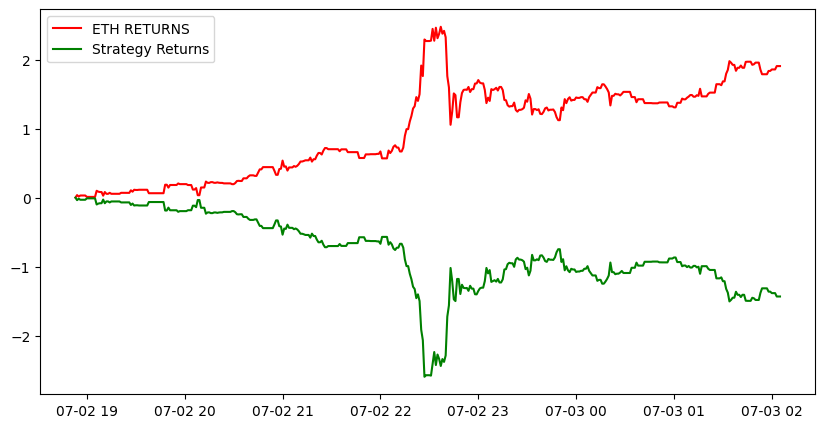

In [54]:
d['Predicted_Signal'] = knn.predict(X)
print(list(d['Predicted_Signal'].values))
# SPY Cumulative Returns
d['ETH_RETURNS'] = np.log(d['close']/d['close'].shift(1))
cumu_Eth_returns = d[split:]['SPY_returns'].cumsum()*100

# Cumulative Strategy Returns 
d['Startegy_returns'] = d['ETH_RETURNS']* d['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = d[split:]['Startegy_returns'].cumsum()*100

# Plot the results to visualize the performance

plt.figure(figsize=(10,5))
plt.plot(cumu_Eth_returns, color='r',label = 'ETH RETURNS')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [115]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jul  5 10:31:29 2019

@author: Vibhu
"""
# Data Manupulation
import numpy as np
import pandas as pd

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the data from Yahoo
ticker='SPY'
df = yf.download(ticker,period='6mo')
# df= pdr.get_data_yahoo('SPY', '2012-01-01', '2017-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,384.369995,386.429993,377.829987,380.820007,377.968140,74850700
2023-01-04,383.179993,385.880005,380.000000,383.760010,380.886139,85934100
2023-01-05,381.720001,381.839996,378.760010,379.380005,376.538910,76970500
2023-01-06,382.609985,389.250000,379.410004,388.079987,385.173737,104189600
2023-01-09,390.369995,393.700012,387.670013,387.859985,384.955383,73978100
...,...,...,...,...,...,...
2023-06-26,432.619995,434.609985,431.190002,431.440002,431.440002,72823600
2023-06-27,432.350006,436.809998,431.880005,436.170013,436.170013,72813700
2023-06-28,435.049988,437.440002,434.410004,436.390015,436.390015,75636000


In [73]:
df = get_ohlcv()

In [106]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-03,408.850006,411.369995,408.440002,410.950012,409.429138,67391100
2023-04-04,411.619995,411.920013,407.239990,408.670013,407.157593,66601500
2023-04-05,407.910004,408.700012,405.880005,407.600006,406.091553,65200200
2023-04-06,406.769989,409.480011,405.679993,409.190002,407.675659,63743300
2023-04-10,406.609985,409.690002,405.970001,409.609985,408.094086,63681000
...,...,...,...,...,...,...
2023-06-26,432.619995,434.609985,431.190002,431.440002,431.440002,72823600
2023-06-27,432.350006,436.809998,431.880005,436.170013,436.170013,72813700
2023-06-28,435.049988,437.440002,434.410004,436.390015,436.390015,75636000


In [116]:
df = df.dropna()
df = df[['Open', 'High', 'Low','Close']]
df.head()

# Predictor variables
df['Open-Close']= df.Open -df.Close
df['High-Low']  = df.High - df.Low
df =df.dropna()
X= df[['Open-Close', 'High-Low']]
X

,Open-Close,High-Low
Date,,
2023-01-03,3.549988,8.600006
2023-01-04,-0.580017,5.880005
2023-01-05,2.339996,3.079987
2023-01-06,-5.470001,9.839996
2023-01-09,2.510010,6.029999
...,...,...
2023-06-26,1.179993,3.419983
2023-06-27,-3.820007,4.929993
2023-06-28,-1.340027,3.029999


In [117]:
# Target variable
Y= np.where(df['Close'].shift(-1)>df['Close'],1,-1)
print(list(Y))

[1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -1]


In [118]:
# Splitting the dataset
split_percentage = 0.7
split = int(split_percentage*len(df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

# Instantiate KNN learning model(k=15)
knn = KNeighborsClassifier(n_neighbors=15)

# fit the model
knn.fit(X_train, Y_train)

# Accuracy Score
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

# Predicted Signal
df['Predicted_Signal'] = knn.predict(X)

Train_data Accuracy: 0.49
Test_data Accuracy: 0.63


In [119]:
print(list(df['Predicted_Signal'].values))

[1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


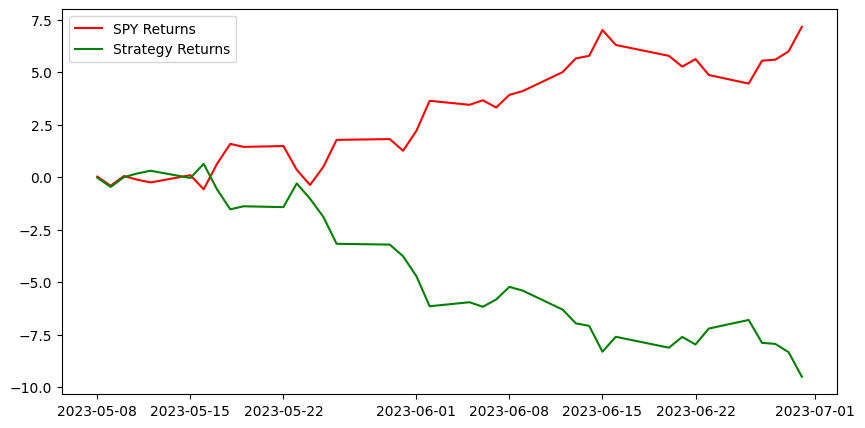

Sharpe ratio: -2.25


In [120]:
# SPY Cumulative Returns
df['SPY_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_SPY_returns = df[split:]['SPY_returns'].cumsum()*100

# Cumulative Strategy Returns 
df['Startegy_returns'] = df['SPY_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = df[split:]['Startegy_returns'].cumsum()*100 * -1

# Plot the results to visualize the performance

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

# Calculate Sharpe reatio
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_SPY_returns)/Std
Sharpe = Sharpe.mean()
print('Sharpe ratio: %.2f'%Sharpe )

In [22]:
exchange.fetch_balance()

{'info': [{'type': 'exchange',
   'currency': 'ETH',
   'amount': '0.004456',
   'available': '0.004456',
   'availableForWithdrawal': '0.004456'},
  {'type': 'exchange',
   'currency': 'USD',
   'amount': '-9.75',
   'available': '0.00',
   'availableForWithdrawal': '0.00'}],
 'ETH': {'free': 0.004456, 'used': 0.0, 'total': 0.004456},
 'USD': {'free': 0.0, 'used': -9.75, 'total': -9.75},
 'free': {'ETH': 0.004456, 'USD': 0.0},
 'used': {'ETH': 0.0, 'USD': -9.75},
 'total': {'ETH': 0.004456, 'USD': -9.75}}

In [26]:
import pandas_ta as ta
import pandas as pd
import ccxt

def getBalanceUSD(exchange= ccxt.gemini({'apiKey': config.apiKey, 'secret': config.apiSecret})):
    balances = exchange.fetch_balance()['free']
    balance = 0

    for token, value in balances.items():
        if float(value)!=0:
            if token != 'USDT':
                request = token+'/USDT'
                try:
                    price = float(exchange.fetchTicker(request)['last'])
                except:
                    try:
                        request = token+'/BTC'
                        price = float(exchange.fetchTicker(request)['last'])
                        val_btc = (float(value))*price
                        price = float(exchange.fetchTicker('BTC/USDT')['last'])
                        balance += val_btc*price
                    except:
                        try:
                            request = token+'/ETH'
                            price = float(exchange.fetchTicker(request)['last'])
                            val_btc = (float(value))*price
                            price = float(exchange.fetchTicker('ETH/USDT')['last'])
                            balance += val_btc*price
                        except:
                            print(token)

                balance += (float(value))*price
            else:
                balance += float(value)
    return balance

In [54]:
exchange.fetch_balance()

{'info': [{'type': 'exchange',
   'currency': 'USD',
   'amount': '-8.79273',
   'available': '0.95727',
   'availableForWithdrawal': '0.00'},
  {'type': 'exchange',
   'currency': 'ETH',
   'amount': '0.003456',
   'available': '0.003456',
   'availableForWithdrawal': '0.003456'}],
 'USD': {'free': 0.95727, 'used': -9.75, 'total': -8.79273},
 'ETH': {'free': 0.003456, 'used': 0.0, 'total': 0.003456},
 'free': {'USD': 0.95727, 'ETH': 0.003456},
 'used': {'USD': -9.75, 'ETH': 0.0},
 'total': {'USD': -8.79273, 'ETH': 0.003456}}

In [49]:
def getBalanceSymbol(exchange= ccxt.gemini({'apiKey': config.apiKey, 'secret': config.apiSecret}), symbol='ETH'):
    balances = exchange.fetch_balance()['free']
    balance = 0

    for token, value in balances.items():
        if float(value)!=0:
            if token == symbol:
                request = token+'/USDT'
                try:
                    price = float(exchange.fetchTicker(request)['last'])
                except:
                    try:
                        request = token+'/BTC'
                        price = float(exchange.fetchTicker(request)['last'])
                        val_btc = (float(value))*price
                        price = float(exchange.fetchTicker('BTC/USDT')['last'])
                        balance += val_btc*price
                    except:
                        try:
                            request = token+'/ETH'
                            price = float(exchange.fetchTicker(request)['last'])
                            val_btc = (float(value))*price
                            price = float(exchange.fetchTicker('ETH/USDT')['last'])
                            balance += val_btc*price
                        except:
                            print(token)

                balance += (float(value))*price
                return balance, float(exchange.fetchTicker(request)['last'])

In [50]:
getBalanceSymbol()

(6.76432512, 1957.27)

In [65]:
exchange= ccxt.gemini({'apiKey': config.apiKey, 'secret': config.apiSecret})

def average_purchase_price(symbol= 'ETH/USD'):
    associated_trades = exchange.fetchMyTrades(symbol='ETH/USD')
    avg_sum = 0
    shares_owned = 0
    for trade in associated_trades:
        print(trade)
        print()
        if trade['side'] == 'buy':
            avg_sum += trade['amount'] * trade['price']
            shares_owned += trade['amount']  
        elif trade['side'] == 'sell':
            avg_sum -= trade['amount'] * trade['price']
            shares_owned -= trade['amount']  
    return avg_sum / shares_owned
average_purchase_price()

{'id': '185635742144', 'order': '185635742125', 'info': {'price': '1965.88', 'amount': '0.004456', 'timestamp': '1688429303', 'timestampms': '1688429303317', 'type': 'Buy', 'aggressor': True, 'fee_currency': 'USD', 'fee_amount': '0.99003872', 'tid': '185635742144', 'order_id': '185635742125', 'exchange': 'gemini', 'is_auction_fill': False, 'is_clearing_fill': False, 'symbol': 'ETHUSD'}, 'timestamp': 1688429303317, 'datetime': '2023-07-04T00:08:23.317Z', 'symbol': 'ETH/USD', 'type': None, 'side': 'buy', 'takerOrMaker': None, 'price': 1965.88, 'cost': 8.75996128, 'amount': 0.004456, 'fee': {'cost': 0.99003872, 'currency': 'USD'}, 'fees': [{'cost': 0.99003872, 'currency': 'USD'}]}

{'id': '185640487423', 'order': '185640487412', 'info': {'price': '1947.27', 'amount': '0.001', 'timestamp': '1688431522', 'timestampms': '1688431522743', 'type': 'Sell', 'aggressor': True, 'fee_currency': 'USD', 'fee_amount': '0.99', 'tid': '185640487423', 'order_id': '185640487412', 'exchange': 'gemini', 'is_

1971.2648379629634

In [42]:
exchange= ccxt.gemini({'apiKey': config.apiKey, 'secret': config.apiSecret})
for mk in exchange.fetchMarkets():
    if "ETH" in mk.values():
        print(mk)

{'id': 'ethbtc', 'symbol': 'ETH/BTC', 'base': 'ETH', 'quote': 'BTC', 'settle': None, 'baseId': 'eth', 'quoteId': 'btc', 'settleId': None, 'type': 'spot', 'spot': True, 'margin': False, 'swap': False, 'future': False, 'option': False, 'active': None, 'contract': False, 'linear': None, 'inverse': None, 'contractSize': None, 'expiry': None, 'expiryDatetime': None, 'strike': None, 'optionType': None, 'precision': {'amount': 1e-06, 'price': 1e-05}, 'limits': {'leverage': {'min': None, 'max': None}, 'amount': {'min': 0.001, 'max': None}, 'price': {'min': None, 'max': None}, 'cost': {'min': None, 'max': None}}, 'info': '<td>ethbtc</td>\n<td>0.001 ETH (1e-3)</td>\n<td>0.000001 ETH (1e-6)</td>\n<td>0.00001 BTC (1e-5)</td>\n</tr>'}
{'id': 'ethusd', 'symbol': 'ETH/USD', 'base': 'ETH', 'quote': 'USD', 'settle': None, 'baseId': 'eth', 'quoteId': 'usd', 'settleId': None, 'type': 'spot', 'spot': True, 'margin': False, 'swap': False, 'future': False, 'option': False, 'active': None, 'contract': False,